In [1]:
import  os
import numpy as np
import pandas as pd
import scipy.stats
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
class DataModels:
    data=[]
    results=[]
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    filepath='Regression_data'
    
    def __init__(self):
        filepath='Regression_data'
        load_data=np.genfromtxt(os.path.join(filepath, filename), delimiter=',' ,\
                             usecols=np.arange(unpredictable, columns), skip_header=skiprows)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        
    def pre_process(self):
        
        #self.data=self.missing_values(self.data)
        np.random.seed(0)
        self.x_train, self.x_test,\
        self.y_train, self.y_test =sklearn.model_selection.train_test_split(self.data, self.results, test_size=0.3, \
                                                                                random_state=15)
        scaler=sklearn.preprocessing.StandardScaler().fit(self.x_train)
        self.x_train=scaler.transform(self.x_train)
        self.x_test=scaler.transform(self.x_test)
        
    def missing_values(self, data):
        imputer = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='mean')
        imputer.fit(data)
        return imputer.transform(data)
        
class Communities(DataModels):
    
    def __init__(self):
        
        load_data=np.genfromtxt(os.path.join(self.filepath, 'communities.data'), delimiter=',' ,\
                                usecols=np.arange(5, 128), skip_header=0)
        
        self.data=load_data[:,:-1]
        self.data=self.missing_values(self.data)
        self.results = load_data[:,-1]
        self.pre_process()
        
class Bike(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'hour.csv'), delimiter=',' ,\
                             usecols=np.arange(2, 17), skiprows=1)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()

class Facebook(DataModels):
    def __init__(self):
        
        def to_int(s):
            if s.decode('utf-8')=="Photo":
                return 0
            elif s.decode('utf-8')=="Status":
                return 1
            elif s.decode('utf-8')=="Link":
                return 2
            else:
                return 3
        
        load_data=np.genfromtxt(os.path.join(self.filepath, 'dataset_Facebook.csv'), delimiter=';' , converters={1:to_int},\
                                skip_header=1, dtype=np.int32 )
        

       
        self.data=load_data[:, :-1]
        self.results = load_data[:,-1]
        self.pre_process()
        
class Concrete(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'Concrete_data.csv'), delimiter=',' ,\
                                 skiprows=1)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()
        
class Student(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'student-por.csv'), delimiter=';' ,\
                                 usecols=(2, 6, 7,12, 13, 14, 23,24,25,26,27,28,29,30,31,32 ),\
                              skiprows=1, dtype=np.int32, converters={30: lambda x: int(x.decode('utf-8').strip("\"")),\
                                                                      31:lambda x: int(x.decode('utf-8').strip("\""))})
        
        self.data=load_data[: ,:-1]
        self.results = load_data[:,-1]
        self.pre_process()
        
class Sgemm(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'sgemm_product.csv'), delimiter=',' ,\
                                 skiprows=1, dtype=np.float32)
        
        self.data=load_data[:2000,14:-1]
        self.results = load_data[:2000,-1]
        self.pre_process()
        
class WineQuality(DataModels):
    def __init__(self):
        
        load_data1=np.loadtxt(os.path.join(self.filepath, 'winequality-red.csv'), delimiter=';' ,\
                                 skiprows=1)
        load_data2=np.loadtxt(os.path.join(self.filepath, 'winequality-white.csv'), delimiter=';' ,\
                                 skiprows=1)
        load_data=np.vstack((load_data1, load_data2))
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()
        

        
class Qsar(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'qsar_aquatic_toxicity.csv'), delimiter=';' ,\
                                skiprows=0)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()

In [3]:
obj=[]
obj.append(Communities())
obj.append(Bike())
obj.append(Facebook())
obj.append(WineQuality())
obj.append(Qsar())
obj.append(Concrete())
obj.append(Student())
obj.append(Sgemm())

titles = ["Communities and Crime", "Facebook Metrics", "Bike Sharing", "Wine Quality" ,"QSAR aquatic toxicity",\
          "Concrete Compressive Strength", "Student Performance","SGEMM GPU Kernel Performance"]

In [4]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as sm

In [45]:
test_scores=[]
train_scores=[]
regressor_names = ["Linear Regression", "Decision tree regression", "Random forest regression",\
                  "k-nearest neighbours regression","AdaBoost regression","Gaussian process regression",\
                   "Neural network regression","Support vector regression"]


def apply_regression(obj, train_score, test_score):
    regressors=[LinearRegression(),  DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),\
                AdaBoostRegressor(), GaussianProcessRegressor(), MLPRegressor(max_iter=100), SVR() ]
    for i in range(len(regressors)):
        regressor=regressors[i];
        print(regressor_names[i])
        regressor.fit(obj.x_train, obj.y_train)
        y_predict=regressor.predict(obj.x_test)
        tr_score=regressor.score(obj.x_train, obj.y_train)
        te_score=regressor.score(obj.x_test, obj.y_test)
        if tr_score<0 : tr_score=0.1
        if te_score<0 : te_score =0.1
        train_score.append(tr_score)
        test_score.append(te_score)
        print(tr_score)
        print(te_score)
        print("")


In [47]:

for i in range(len(obj)):
    train_scr=[]
    test_scr=[]
    
    print("Data Set: %s \n" % titles[i])
    apply_regression(obj[i], train_scr, test_scr)
    test_scores.append(test_scr)
    train_scores.append(train_scr)
    print("\n\n")
    

Data Set: Communities and Crime 

Linear Regression
0.7176516859671732
0.1

Decision tree regression
1.0
0.34933575722182963

Random forest regression
0.9504939213690191
0.6405027520291084

k-nearest neighbours regression
0.726298259300233
0.5562014281173444

AdaBoost regression
0.6135831665661159
0.478574424424133

Gaussian process regression
1.0
0.1

Neural network regression
0.9213174280770307
0.1

Support vector regression
0.8466239502669322
0.5484174429852048




Data Set: Facebook Metrics 

Linear Regression
1.0
1.0

Decision tree regression
1.0
0.9991096641888705

Random forest regression
0.9999608523137301
0.9998267995937491

k-nearest neighbours regression
0.9748460333220453
0.9587817287026642

AdaBoost regression
0.9802786407276074
0.9796240437345677

Gaussian process regression
1.0
0.9510164414767213

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9996008208476714
0.9994786996623958

Support vector regression
0.8947240682999966
0.8973617231584267




Data Set: Bike Sharing 

Linear Regression
0.999999965728199
0.9999998638103724

Decision tree regression
1.0
0.599202412315957

Random forest regression
0.9972797659011168
0.5462449885766716

k-nearest neighbours regression
0.9278751408481243
0.5076142141260527

AdaBoost regression
0.9849702870123225
0.5446843155254018

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1
0.035949416712846016

Support vector regression
0.1
0.1




Data Set: Wine Quality 

Linear Regression
0.285690484842979
0.3049950147008007

Decision tree regression
1.0
0.06634592078003454

Random forest regression
0.930431435741152
0.507295650265027

k-nearest neighbours regression
0.5678927080658398
0.35397448972591783

AdaBoost regression
0.33307173452507943
0.3105179614001775

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4209270281023041
0.3888955624005931

Support vector regression
0.47194341083283775
0.4069542686220885




Data Set: QSAR aquatic toxicity 

Linear Regression
0.49467794550016575
0.45385701528074496

Decision tree regression
0.9991403815285058
0.301681888793107

Random forest regression
0.9232539410301519
0.5368337650348916

k-nearest neighbours regression
0.6766591544205361
0.46460783867503974

AdaBoost regression
0.6249990039205334
0.48220151062617467

Gaussian process regression
0.9991395808031673
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1
0.1

Support vector regression
0.626006959598777
0.47910483951632465




Data Set: Concrete Compressive Strength 

Linear Regression
0.6258082214141357
0.5787164093036458

Decision tree regression
0.9948906423492005
0.8561057035160171

Random forest regression
0.9825534678300039
0.9233747353239813

k-nearest neighbours regression
0.8089929771884918
0.7516554805726083

AdaBoost regression
0.8095377851963448
0.7890005522597952

Gaussian process regression
0.9948848790482739
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.05459355755799333
0.1

Support vector regression
0.644326949772051
0.6761453468368382




Data Set: Student Performance 

Linear Regression
0.8798762463041925
0.7825576155271756

Decision tree regression
1.0
0.6661564951214847

Random forest regression
0.9798332679080242
0.8042280466806964

k-nearest neighbours regression
0.7833210269922485
0.5621771570690645

AdaBoost regression
0.8966965761748007
0.7438643892563157

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.28865046141122774
0.27429974515323163

Support vector regression
0.785860454900458
0.6458110126935218




Data Set: SGEMM GPU Kernel Performance 

Linear Regression
0.9992266832613104
0.9991562078763073

Decision tree regression
0.9999999996336579
0.9989277349078044

Random forest regression
0.9998973017510364
0.9993073221534072

k-nearest neighbours regression
0.9995247789525125
0.9992605585542633

AdaBoost regression
0.9971187544937042
0.9970682239445232

Gaussian process regression
0.999532964357478
0.9960654629248156

Neural network regression
0.1
0.1

Support vector regression
0.9838030640287599
0.9834955109025583






C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [48]:
def plot_results():
    for i in range(len(obj)):
        fig, ax = plt.subplots()
        plt.xticks(rotation=90)
        ax.set_title(titles[i])
        ax.plot(regressor_names, train_scores[i], label='Training Score', color='red', marker='o')
        ax.plot(regressor_names, test_scores[i], label='Testing Score', color='black', marker='o')
        
        ax.legend()

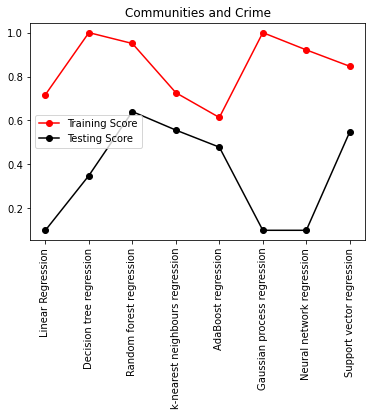

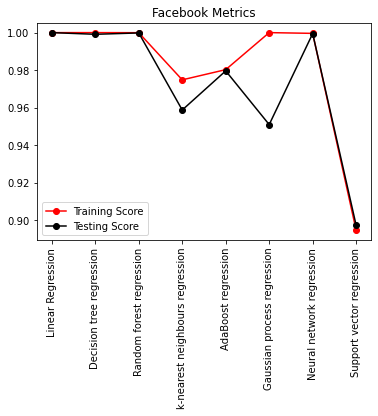

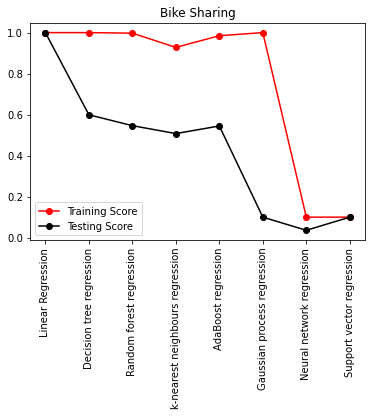

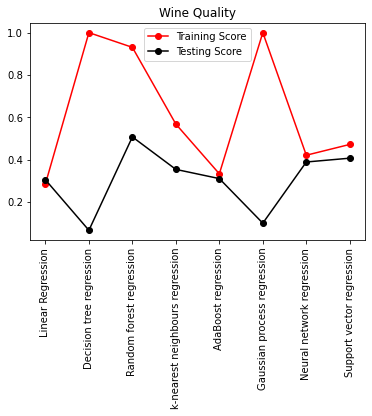

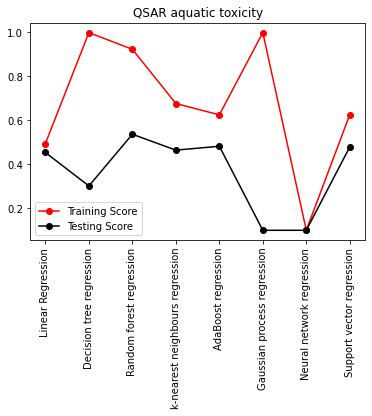

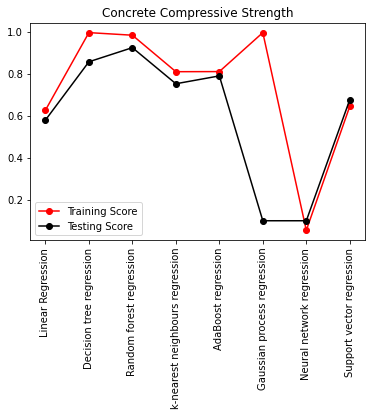

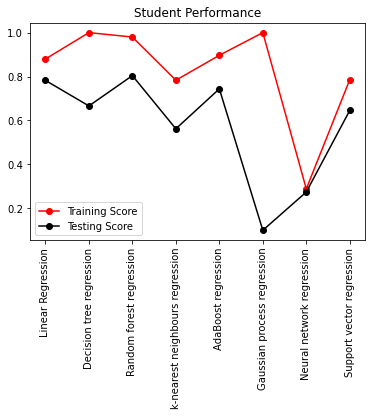

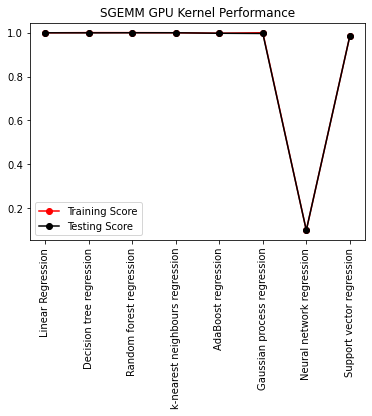

In [49]:
plot_results() #for direct_fit regressors


Average scores for direct fit:


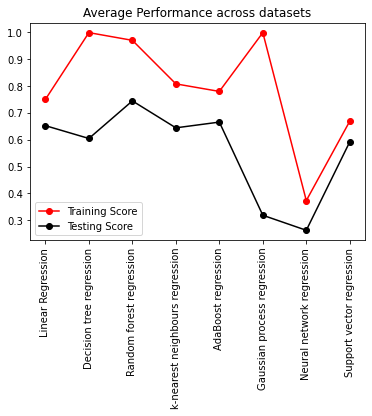

In [53]:
avg_train_scores=np.mean(np.array(train_scores), axis=0)
avg_test_scores=np.mean(np.array(test_scores), axis=0)
print("Average scores for direct fit:")
    
fig, ax=plt.subplots()
plt.xticks(rotation=90)
ax.set_title("Average Performance across datasets")
ax.plot(regressor_names, avg_train_scores, label='Training Score', color='red', marker='o')
ax.plot(regressor_names, avg_test_scores, label='Testing Score', color='black', marker='o')      
ax.legend()

In [54]:
from sklearn.gaussian_process.kernels import RBF

#params for grid search and random search cv

params = []
params.append({})
params.append({'C':1, 'kernel':'rbf', 'gamma':'auto', 'epsilon':0.1})
params.append({'max_depth':(None,), 'min_samples_leaf':(1,)})
params.append({'n_estimators':(10,), 'max_depth':(None,)})
params.append({})
params.append({'n_estimators':(10,),'learning_rate':(1.,)})
params.append({'kernel':(1.0* RBF(1.0)), 'alpha':(1e-10,), 'normalize_y':(True,)})
params.append({'early_stopping':(False,), 'hidden_layer_sizes':(100,), 'activation':('relu',), 'batch_size':('auto',),\
              'max_iter':200})


In [55]:
def apply_regression_rs(obj, train_score, test_score):
    regressors=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),\
                AdaBoostRegressor(), GaussianProcessRegressor(), MLPRegressor(max_iter=100), SVR() ]
    for i in range(len(regressors)):
        
        regressor=RandomizedSearchCV(estimators=regressors[i], param_distributions=params[i], cv=3, random_state=0);
        print(regressor_names[i])
        regressor.fit(obj.x_train, obj.y_train)
        y_predict=regressor.predict(obj.x_test)
        train_score.append(regressor.score(obj.x_train, obj.y_train))
        test_score.append(regressor.score(obj.x_test, obj.y_test))
        print(regressor.score(obj.x_train, obj.y_train))
        print(regressor.score(obj.x_test, obj.y_test))
        print("")


In [56]:
for i in range(len(obj)):
    train_scr=[]
    test_scr=[]
    
    print("Data Set: %s \n" % titles[i])
    apply_regression(obj[i], train_scr, test_scr)
    test_scores.append(test_scr)
    train_scores.append(train_scr)
    print("\n\n")


Data Set: Communities and Crime 

Linear Regression
0.7176516859671732
0.1

Decision tree regression
1.0
0.2984703544044135

Random forest regression
0.9511816961251205
0.6377105819582414

k-nearest neighbours regression
0.726298259300233
0.5562014281173444

AdaBoost regression
0.6188491845991606
0.505324800396298

Gaussian process regression
1.0
0.1

Neural network regression
0.9549323138628877
0.01944715609611014

Support vector regression
0.8466239502669322
0.5484174429852048




Data Set: Facebook Metrics 

Linear Regression
1.0
1.0

Decision tree regression
1.0
0.9991847747870726

Random forest regression
0.9999654902390607
0.999833207478491

k-nearest neighbours regression
0.9748460333220453
0.9587817287026642

AdaBoost regression
0.9810938258198146
0.9804380241261558

Gaussian process regression
1.0
0.9510164414767213

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9995276077439089
0.9994055768037282

Support vector regression
0.8947240682999966
0.8973617231584267




Data Set: Bike Sharing 

Linear Regression
0.999999965728199
0.9999998638103724

Decision tree regression
1.0
0.5950416834686217

Random forest regression
0.9980398857949284
0.5580337441813373

k-nearest neighbours regression
0.9278751408481243
0.5076142141260527

AdaBoost regression
0.9859573745788202
0.5334153980542014

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1
0.013414738087609512

Support vector regression
0.1
0.1




Data Set: Wine Quality 

Linear Regression
0.285690484842979
0.3049950147008007

Decision tree regression
1.0
0.0807520454410332

Random forest regression
0.9309172659652674
0.5057218840467034

k-nearest neighbours regression
0.5678927080658398
0.35397448972591783

AdaBoost regression
0.3444720241267729
0.31883891698327693

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.41303705192088447
0.3782430842059059

Support vector regression
0.47194341083283775
0.4069542686220885




Data Set: QSAR aquatic toxicity 

Linear Regression
0.49467794550016575
0.45385701528074496

Decision tree regression
0.9991403815285058
0.20042602840097945

Random forest regression
0.9296286185062179
0.5393695866916386

k-nearest neighbours regression
0.6766591544205361
0.46460783867503974

AdaBoost regression
0.6036385305826169
0.47573303313627324

Gaussian process regression
0.9991395808031673
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.11646632265469092
0.1

Support vector regression
0.626006959598777
0.47910483951632465




Data Set: Concrete Compressive Strength 

Linear Regression
0.6258082214141357
0.5787164093036458

Decision tree regression
0.9948906423492005
0.8692946251680501

Random forest regression
0.9817693748492685
0.9195705393842413

k-nearest neighbours regression
0.8089929771884918
0.7516554805726083

AdaBoost regression
0.8155372876813075
0.8009061941815188

Gaussian process regression
0.9948848790482739
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.20894550293719727
0.14074461795520854

Support vector regression
0.644326949772051
0.6761453468368382




Data Set: Student Performance 

Linear Regression
0.8798762463041925
0.7825576155271756

Decision tree regression
1.0
0.6675913525923092

Random forest regression
0.9808706954295475
0.7956832312990243

k-nearest neighbours regression
0.7833210269922485
0.5621771570690645

AdaBoost regression
0.9021560212363458
0.7422078994135315

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2812685806781253
0.27343081355348164

Support vector regression
0.785860454900458
0.6458110126935218




Data Set: SGEMM GPU Kernel Performance 

Linear Regression
0.9992266832613104
0.9991562078763073

Decision tree regression
0.9999999996336579
0.9988659218774345

Random forest regression
0.9998925529737244
0.999299675667248

k-nearest neighbours regression
0.9995247789525125
0.9992605585542633

AdaBoost regression
0.9972770827955888
0.9970691645624651

Gaussian process regression
0.999532964357478
0.9960654629248156

Neural network regression
0.1
0.029442803521670835

Support vector regression
0.9838030640287599
0.9834955109025583






C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


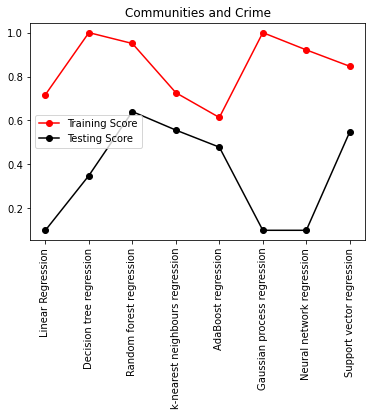

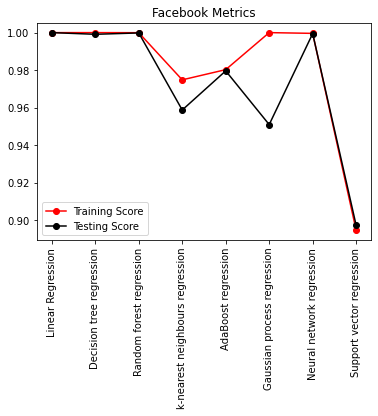

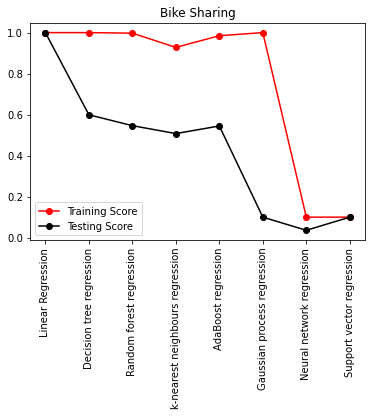

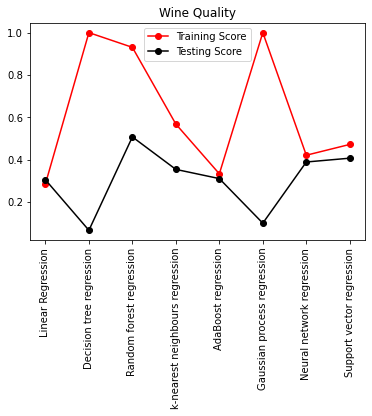

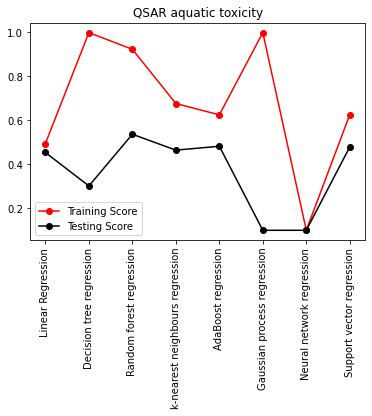

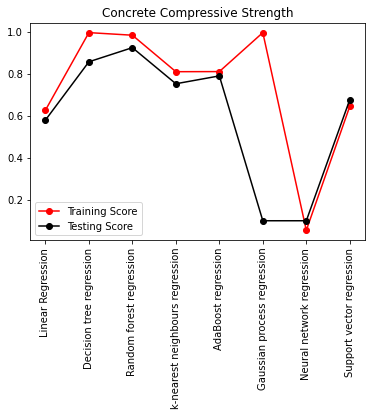

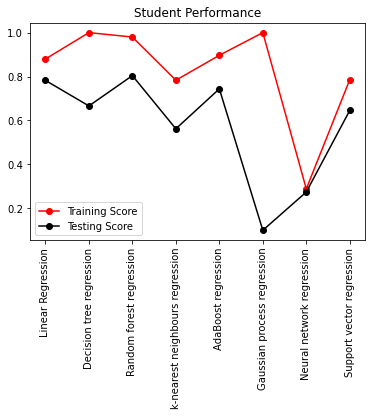

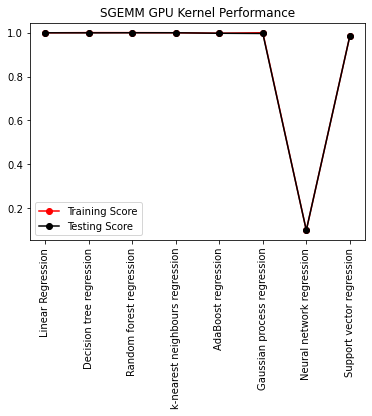

In [57]:
plot_results() #for randomizedSearch cv regressors

Average scores for RandomizedSearchCV:


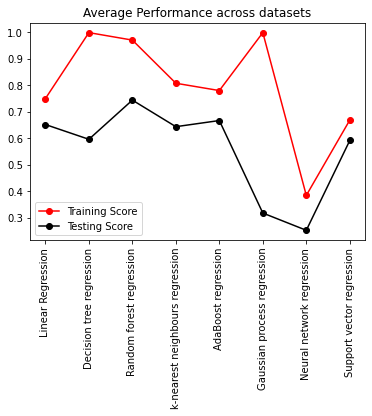

In [58]:
avg_train_scores=np.mean(np.array(train_scores), axis=0)
avg_test_scores=np.mean(np.array(test_scores), axis=0)
print("Average scores for RandomizedSearchCV:")
    
fig, ax=plt.subplots()
plt.xticks(rotation=90)
ax.set_title("Average Performance across datasets")
ax.plot(regressor_names, avg_train_scores, label='Training Score', color='red', marker='o')
ax.plot(regressor_names, avg_test_scores, label='Testing Score', color='black', marker='o')      
ax.legend()

In [59]:
def apply_regression_gs(obj, train_score, test_score):
    regressors=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),\
                AdaBoostRegressor(), GaussianProcessRegressor(), MLPRegressor(max_iter=100), SVR() ]
    for i in range(len(regressors)):
        
        regressor=GridSearchCV(estimators=regressors[i], param_distributions=params[i], cv=3, random_state=0);
        print(regressor_names[i])
        regressor.fit(obj.x_train, obj.y_train)
        y_predict=regressor.predict(obj.x_test)
        train_score.append(regressor.score(obj.x_train, obj.y_train))
        test_score.append(regressor.score(obj.x_test, obj.y_test))
        print(regressor.score(obj.x_train, obj.y_train))
        print(regressor.score(obj.x_test, obj.y_test))
        print("")


In [60]:
for i in range(len(obj)):
    train_scr=[]
    test_scr=[]
    
    print("Data Set: %s \n" % titles[i])
    apply_regression(obj[i], train_scr, test_scr)
    test_scores.append(test_scr)
    train_scores.append(train_scr)
    print("\n\n")

Data Set: Communities and Crime 

Linear Regression
0.7176516859671732
0.1

Decision tree regression
1.0
0.28717633018928745

Random forest regression
0.9503912016220831
0.642071935608076

k-nearest neighbours regression
0.726298259300233
0.5562014281173444

AdaBoost regression
0.6192391120354968
0.4867856532781366

Gaussian process regression
1.0
0.1

Neural network regression
0.8803515458202595
0.1

Support vector regression
0.8466239502669322
0.5484174429852048




Data Set: Facebook Metrics 

Linear Regression
1.0
1.0

Decision tree regression
1.0
0.9992013231933359

Random forest regression
0.9999608749524835
0.9998245804705836

k-nearest neighbours regression
0.9748460333220453
0.9587817287026642

AdaBoost regression
0.9789016048857955
0.9782756186887551

Gaussian process regression
1.0
0.9510164414767213

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9995542156171132
0.999475520559068

Support vector regression
0.8947240682999966
0.8973617231584267




Data Set: Bike Sharing 

Linear Regression
0.999999965728199
0.9999998638103724

Decision tree regression
1.0
0.5859846718154599

Random forest regression
0.9974091483109839
0.5512049519912706

k-nearest neighbours regression
0.9278751408481243
0.5076142141260527

AdaBoost regression
0.9844015893452532
0.5793808689501605

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1
0.0183102994972123

Support vector regression
0.1
0.1




Data Set: Wine Quality 

Linear Regression
0.285690484842979
0.3049950147008007

Decision tree regression
1.0
0.07938003356855716

Random forest regression
0.931035117571235
0.5106278554997097

k-nearest neighbours regression
0.5678927080658398
0.35397448972591783

AdaBoost regression
0.3377071546127388
0.31252128943248425

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4283050300261215
0.38794009667506046

Support vector regression
0.47194341083283775
0.4069542686220885




Data Set: QSAR aquatic toxicity 

Linear Regression
0.49467794550016575
0.45385701528074496

Decision tree regression
0.9991403815285058
0.18462561624538787

Random forest regression
0.9312421410918563
0.5321116726270069

k-nearest neighbours regression
0.6766591544205361
0.46460783867503974

AdaBoost regression
0.6163443616514257
0.4916225680638575

Gaussian process regression
0.9991395808031673
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.21245715344990956
0.1

Support vector regression
0.626006959598777
0.47910483951632465




Data Set: Concrete Compressive Strength 

Linear Regression
0.6258082214141357
0.5787164093036458

Decision tree regression
0.9948906423492005
0.8605572726264975

Random forest regression
0.9821016789906601
0.9254692565236632

k-nearest neighbours regression
0.8089929771884918
0.7516554805726083

AdaBoost regression
0.8159998289203426
0.8032898341219082

Gaussian process regression
0.9948848790482739
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.254290615649029
0.15848272354595505

Support vector regression
0.644326949772051
0.6761453468368382




Data Set: Student Performance 

Linear Regression
0.8798762463041925
0.7825576155271756

Decision tree regression
1.0
0.6632867801798354

Random forest regression
0.9799262892934832
0.7979987086282763

k-nearest neighbours regression
0.7833210269922485
0.5621771570690645

AdaBoost regression
0.8996683312190384
0.7653828782256838

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.37765627919315103
0.3217783576733996

Support vector regression
0.785860454900458
0.6458110126935218




Data Set: SGEMM GPU Kernel Performance 

Linear Regression
0.9992266832613104
0.9991562078763073

Decision tree regression
0.9999999996336579
0.998890375241049

Random forest regression
0.9998900087025753
0.9993138740021374

k-nearest neighbours regression
0.9995247789525125
0.9992605585542633

AdaBoost regression
0.9965645893542164
0.9966401614662196

Gaussian process regression
0.999532964357478
0.9960654629248156

Neural network regression
0.1
0.1

Support vector regression
0.9838030640287599
0.9834955109025583






C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


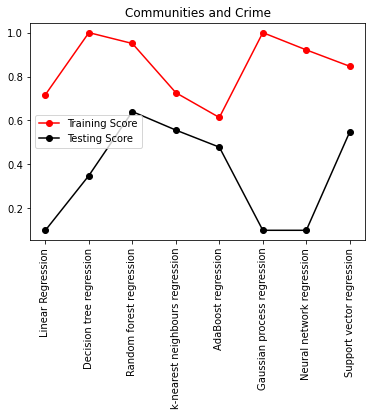

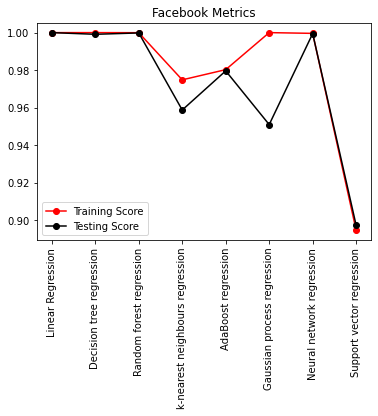

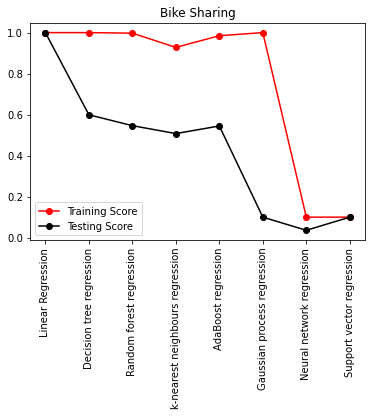

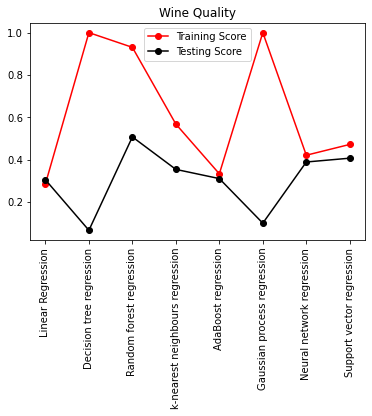

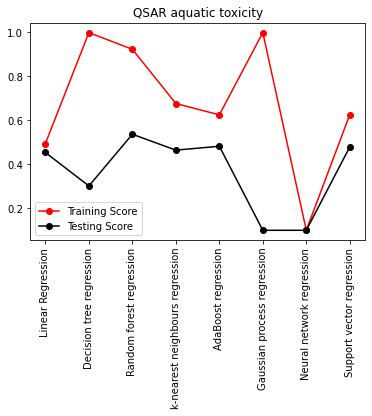

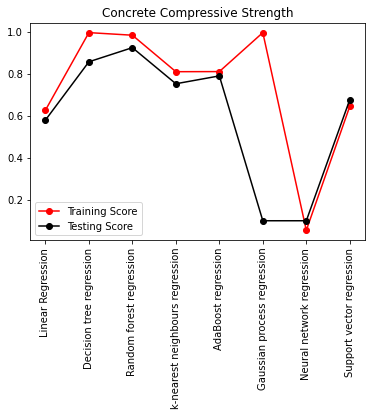

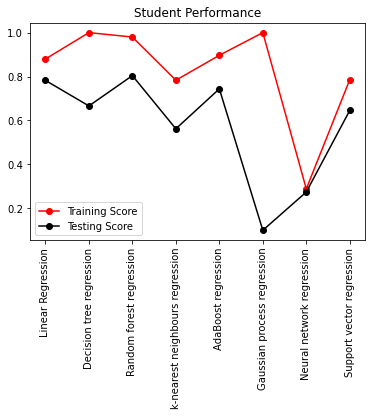

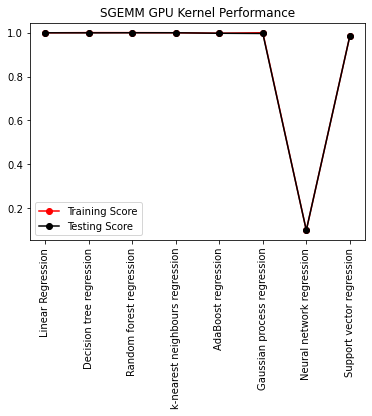

In [61]:
plot_results() #for gridSearchCV regressors

Average scores for GridSearchCV:


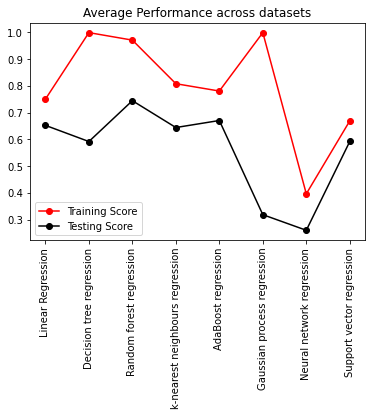

In [62]:
avg_train_scores=np.mean(np.array(train_scores), axis=0)
avg_test_scores=np.mean(np.array(test_scores), axis=0)
print("Average scores for GridSearchCV:")
    
fig, ax=plt.subplots()
plt.xticks(rotation=90)
ax.set_title("Average Performance across datasets")
ax.plot(regressor_names, avg_train_scores, label='Training Score', color='red', marker='o')
ax.plot(regressor_names, avg_test_scores, label='Testing Score', color='black', marker='o')      
ax.legend()